## <center>Clustering</center>

Jadi itu data reaksi di facebook terhadap unggahan (foto,video,link) di 10 halaman penjualan. Anggap kalian sebagai yang punya toko. Tugas kalian carilah informasi yang dapat digunakan oleh kalian dalam menentukan kebijakan atau strategi penjualan kedepan berdasarkan data di atas. Carilah informasi yang berguna sebanyak banyaknya

<h6> status_id	= ID

status_type	= Video/Photo/Link

status_published	= Waktu dipublishnya kapan

num_reactions	        = Jumlah Reaksi dari unggahan 

num_comments	        = Jumlah comments

num_shares	        = Jumlah yang nge-share

num_likes	        = Jumlah yang nge-likes (Emot jempol)

num_loves	        = Jumlah yang menyukai (Emot Love/Hati)

num_wows	        = Jumlah yang merespon wow (Emot ekspresi wow kaget)

num_hahas	        = Jumlah yang merespon tertawa (Emot ekspresi tertawa/tersenyum)

num_sads	        = Jumlah yang merespon Sedih (Emot ekspresi Sedih/menangis)

num_angrys              = Jumlah yang merespon Marah (Emot ekspresi marah)</h6>

- Semakin besar nilai indeks Dunn, semakin baik klasteringnya.
- Semakin kecil nilai indeks Davies-Bouldin, semakin baik klasteringnya.
- Semakin kecil nilai inertia, semakin baik klasteringnya.

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [85]:
df = pd.read_csv('Live_20210128.csv')
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [87]:
df.shape

(7050, 16)

In [88]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [89]:
df.duplicated().sum()

0

In [90]:
df = df.drop(['Column1', 'Column2', 'Column3', 'Column4', 'status_id'], axis=1)

In [91]:
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [92]:
for a in df.columns:
    unique = df[a].unique()
    print(f'{a}: {unique}')

status_type: ['video' 'photo' 'link' 'status']
status_published: ['4/22/2018 6:00' '4/21/2018 22:45' '4/21/2018 6:17' ... '9/21/2016 23:03'
 '9/20/2016 0:43' '9/10/2016 10:30']
num_reactions: [529 150 227 ... 558 570 415]
num_comments: [  512     0   236     6   614   453     1     9     2     4    11   100
   256   173   166    15     7    36    78   300    14     8   137   292
    72    39   181   210    12   456    60   235   444    21   255   136
   327   284   114    81   193    32   258    13   259   468   130   251
   247    89   341   316   368    76    63   171   461   540     3    10
    18    16    25   709  1979    17   145   116   157    46   120   486
     5   199    77   825   805   449    49   589   558    31   424   131
   525    24   491   633   588    20    23   417   355   564   110   605
   158   888   911   996   574    34    28  1381   524    19   462    40
   254   265   523   309    61    22   769    48    37   560   117   128
   427    54    95   266    75   1

In [93]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [94]:
df['status_published'] = pd.to_datetime(df['status_published'])

In [95]:
df['status_type'].replace({
    'video': 1,
    'photo': 2, 
    'link': 3,
    'status':4
}, inplace=True)

C:\Users\MyPC PRO L5V\AppData\Local\Temp\ipykernel_10768\361391124.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['status_type'].replace({
C:\Users\MyPC PRO L5V\AppData\Local\Temp\ipykernel_10768\361391124.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['status_type'].replace({


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_type       7050 non-null   int64         
 1   status_published  7050 non-null   datetime64[ns]
 2   num_reactions     7050 non-null   int64         
 3   num_comments      7050 non-null   int64         
 4   num_shares        7050 non-null   int64         
 5   num_likes         7050 non-null   int64         
 6   num_loves         7050 non-null   int64         
 7   num_wows          7050 non-null   int64         
 8   num_hahas         7050 non-null   int64         
 9   num_sads          7050 non-null   int64         
 10  num_angrys        7050 non-null   int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 606.0 KB


<Axes: >

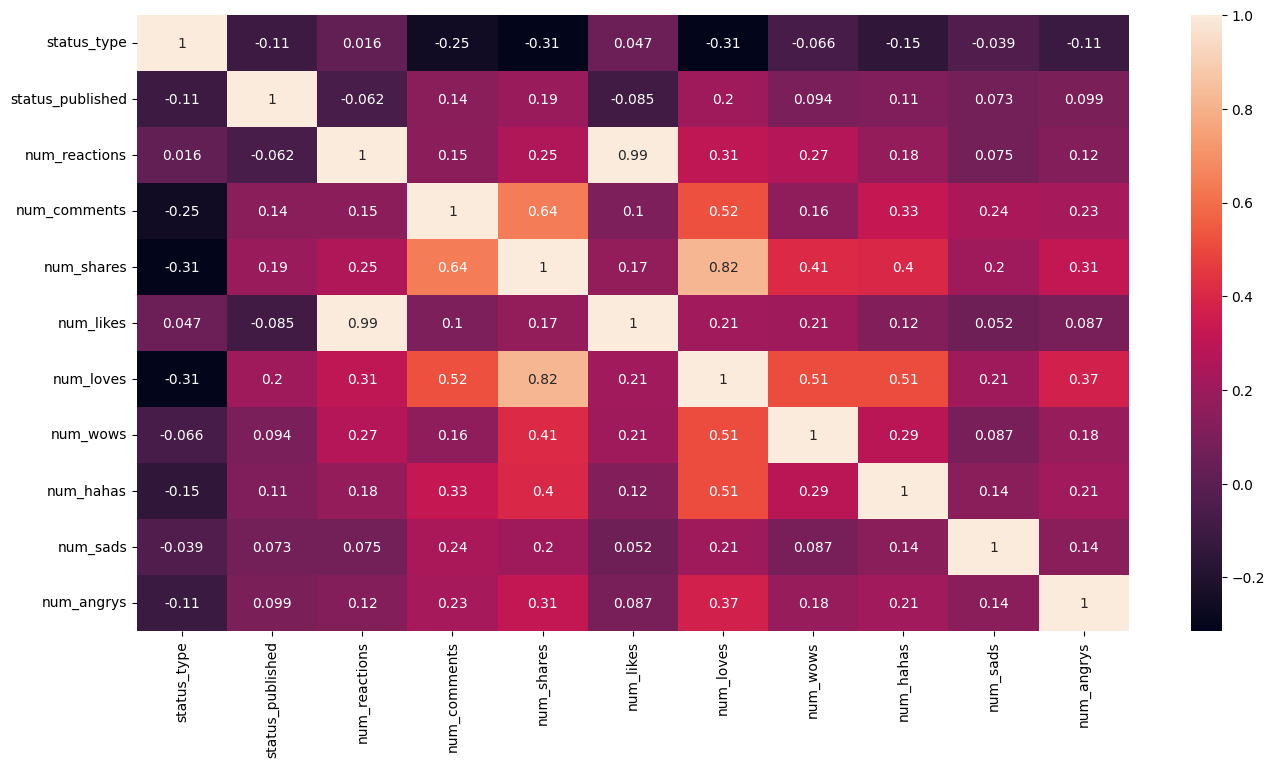

In [97]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True)

<Axes: >

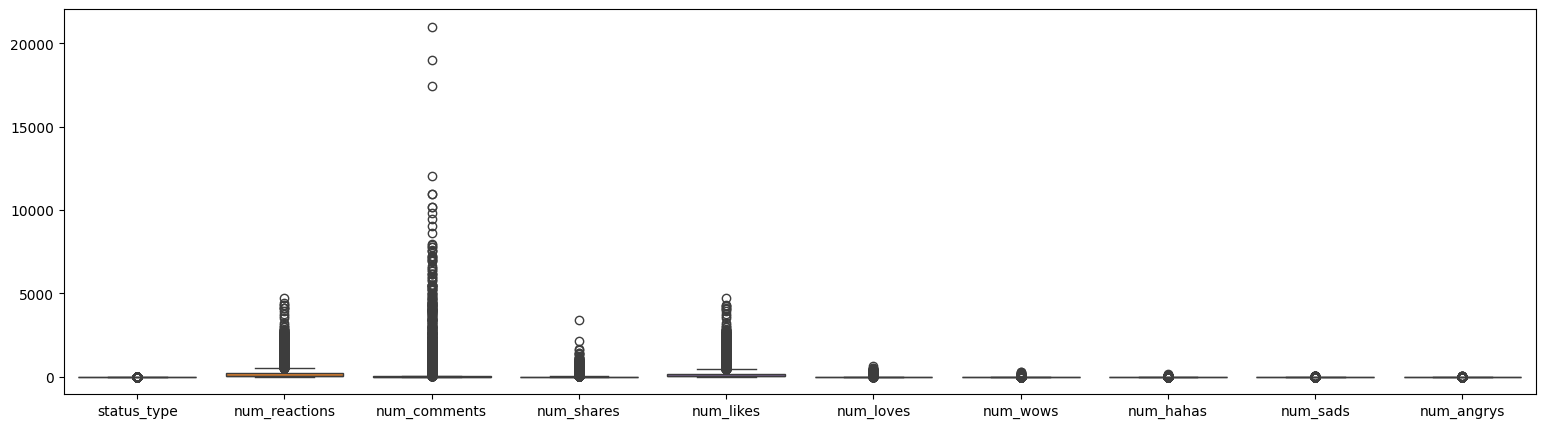

In [98]:
plt.figure(figsize=(19, 5))
sns.boxplot(df)

In [99]:
# df = (df - df.min()) / (df.max()-df.min())

In [100]:
# plt.figure(figsize=(19, 5))
# sns.boxplot(df)

In [121]:
x = df.drop(['status_published','status_type'], axis=1)
y = df['status_type']

In [122]:
x.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0


In [123]:
x.isnull().sum()

num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

In [124]:
x.shape

(7050, 9)

In [125]:
y.shape

(7050,)

In [126]:
cols = x.columns

In [127]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

x = ms.fit_transform(x)

In [128]:
x = pd.DataFrame(x, columns=[cols])

In [129]:
x.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [130]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(x)

KMeans(n_clusters=2, random_state=0)

In [131]:
kmeans.cluster_centers_

array([[0.02483047, 0.00932759, 0.00889636, 0.02254048, 0.01423501,
        0.00215728, 0.00331136, 0.00441161, 0.00279261],
       [0.35566655, 0.02806954, 0.04734731, 0.34084022, 0.08499512,
        0.03631548, 0.01879727, 0.00945925, 0.01461694]])

In [132]:
kmeans.inertia_

99.50082638379922

In [133]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 192 out of 7050 samples were correctly labeled.


In [134]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.03


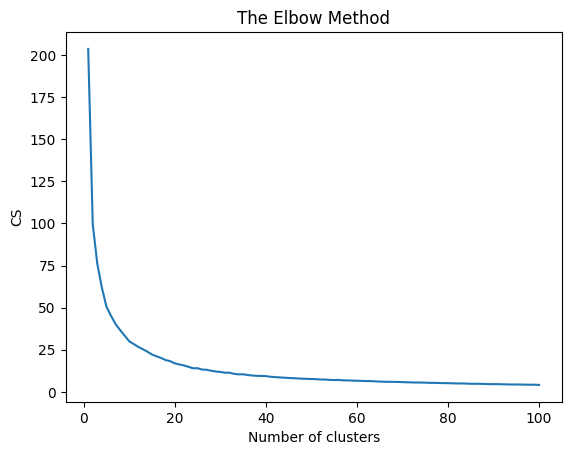

In [144]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 101):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 101), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')

plt.show()

In [136]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(x)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 192 out of 7050 samples were correctly labeled.
Accuracy score: 0.03


In [137]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(x)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4151 out of 7050 samples were correctly labeled.
Accuracy score: 0.59


In [138]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(x)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 3918 out of 7050 samples were correctly labeled.
Accuracy score: 0.56


In [139]:
kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(x)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4078 out of 7050 samples were correctly labeled.
Accuracy score: 0.58


In [140]:
kmeans = KMeans(n_clusters=6, random_state=0)

kmeans.fit(x)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4042 out of 7050 samples were correctly labeled.
Accuracy score: 0.57
